<h2>EDA (Exploratory Data Analysis) </h2>

### En esta etapa se trabajará con los dataframes obtenidos luego de la etapa de ETL. Se cuenta con 3 dataframes:
- df_combinado.csv
- df_nacional.csv
- df_partidos.csv

<h3> Se instalan las librerias que se usarán en este proceso: </h3>

In [1]:
!pip install geopandas

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<h3> Se importan todas las librerias necesarias para trabajar: </h3>

In [2]:
# Librerias necesarias para manipulación de datos 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import geopandas as gpd

from scipy.stats import pearsonr
from scipy.stats import ttest_ind

from sklearn.decomposition import PCA

# Dataframe: "df_combinado"
#### El DataFrame "df_combinado" contiene información sobre las conexiones de Internet en diferentes provincias a lo largo de varios años y trimestres. A continuación se muestra una descripción de las columnas del DataFrame:

- Año: El año correspondiente a los datos de la fila.

- Trimestre: El trimestre correspondiente a los datos de la fila.
- Provincia: El nombre de la provincia para la cual se proporcionan los datos.
- ADSL: Número de conexiones de tipo ADSL en la provincia para el año y trimestre específicos.
- Cablemodem: Número de conexiones de tipo Cablemodem en la provincia para el año y trimestre específicos.
- Fibra óptica: Número de conexiones de tipo Fibra óptica en la provincia para el año y trimestre específicos.
- Wireless: Número de conexiones de tipo Wireless en la provincia para el año y trimestre específicos.
- Otros: Número de conexiones de otros tipos en la provincia para el año y trimestre específicos.
- Total_conexion: Total de conexiones de Internet en la provincia para el año y trimestre específicos.
- Accesos por cada 100 hab: Número de accesos a Internet por cada 100 habitantes en la provincia para el año y trimestre específicos.
- Accesos por cada 100 hogares: Número de accesos a Internet por cada 100 hogares en la provincia para el año y trimestre específicos.
- Banda ancha fija: Número de conexiones de banda ancha fija en la provincia para el año y trimestre específicos.
- Dial up: Número de conexiones de tipo Dial up en la provincia para el año y trimestre específicos.
- Hasta 512 kbps: Número de conexiones con velocidad hasta 512 kbps en la provincia para el año y trimestre específicos.
- 512 Kbps - 1 Mbps: Número de conexiones con velocidad entre 512 Kbps y 1 Mbps en la provincia para el año y trimestre específicos.
- 1 Mbps - 6 Mbps: Número de conexiones con velocidad entre 1 Mbps y 6 Mbps en la provincia para el año y trimestre específicos.
- 6 Mbps - 10 Mbps: Número de conexiones con velocidad entre 6 Mbps y 10 Mbps en la provincia para el año y trimestre específicos.
- 10 Mbps - 20 Mbps: Número de conexiones con velocidad entre 10 Mbps y 20 Mbps en la provincia para el año y trimestre específicos.
- 20 Mbps - 30 Mbps: Número de conexiones con velocidad entre 20 Mbps y 30 Mbps en la provincia para el año y trimestre específicos.
- 30 Mbps: Número de conexiones con velocidad superior a 30 Mbps en la provincia para el año y trimestre específicos.
- Otros Mbps: Número de conexiones con velocidad de otros tipos en la provincia para el año y trimestre específicos.
- Total suma Mbps: Total de la suma de todas las conexiones de Internet por velocidad en la provincia para el año y trimestre específicos.

In [3]:
# Carga del archivo:
df_combinado = pd.read_csv(r"Datasets con ETL\df_combinado.csv")
df_combinado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           936 non-null    int64 
 1   Trimestre                     936 non-null    int64 
 2   Provincia                     936 non-null    object
 3   ADSL                          936 non-null    int64 
 4   Cablemodem                    936 non-null    int64 
 5   Fibra óptica                  936 non-null    int64 
 6   Wireless                      936 non-null    int64 
 7   Otros                         936 non-null    int64 
 8   Total_conexion                936 non-null    int64 
 9   Accesos por cada 100 hab      936 non-null    int64 
 10  Accesos por cada 100 hogares  936 non-null    int64 
 11  Banda ancha fija              936 non-null    int64 
 12  Dial up                       936 non-null    int64 
 13  Hasta 512 kbps      

In [4]:
# Visualizamos algunos datos del df
df_combinado.sample(3)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total_conexion,Accesos por cada 100 hab,...,Dial up,Hasta 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,Otros Mbps,Total suma Mbps
366,2019,4,Corrientes,52525,51845,2002,2458,5004,113834,10,...,3,72,0,35055,20620,27367,9981,15744,4995,113834
3,2023,3,Chaco,16420,60058,54993,8267,2408,142146,11,...,5,236,462,14076,12874,6895,2970,100544,4089,142146
624,2017,1,Buenos Aires,1559178,1465817,118839,21200,24342,3189376,18,...,11202,6017,83918,2057698,402315,523540,90937,22299,0,3186724


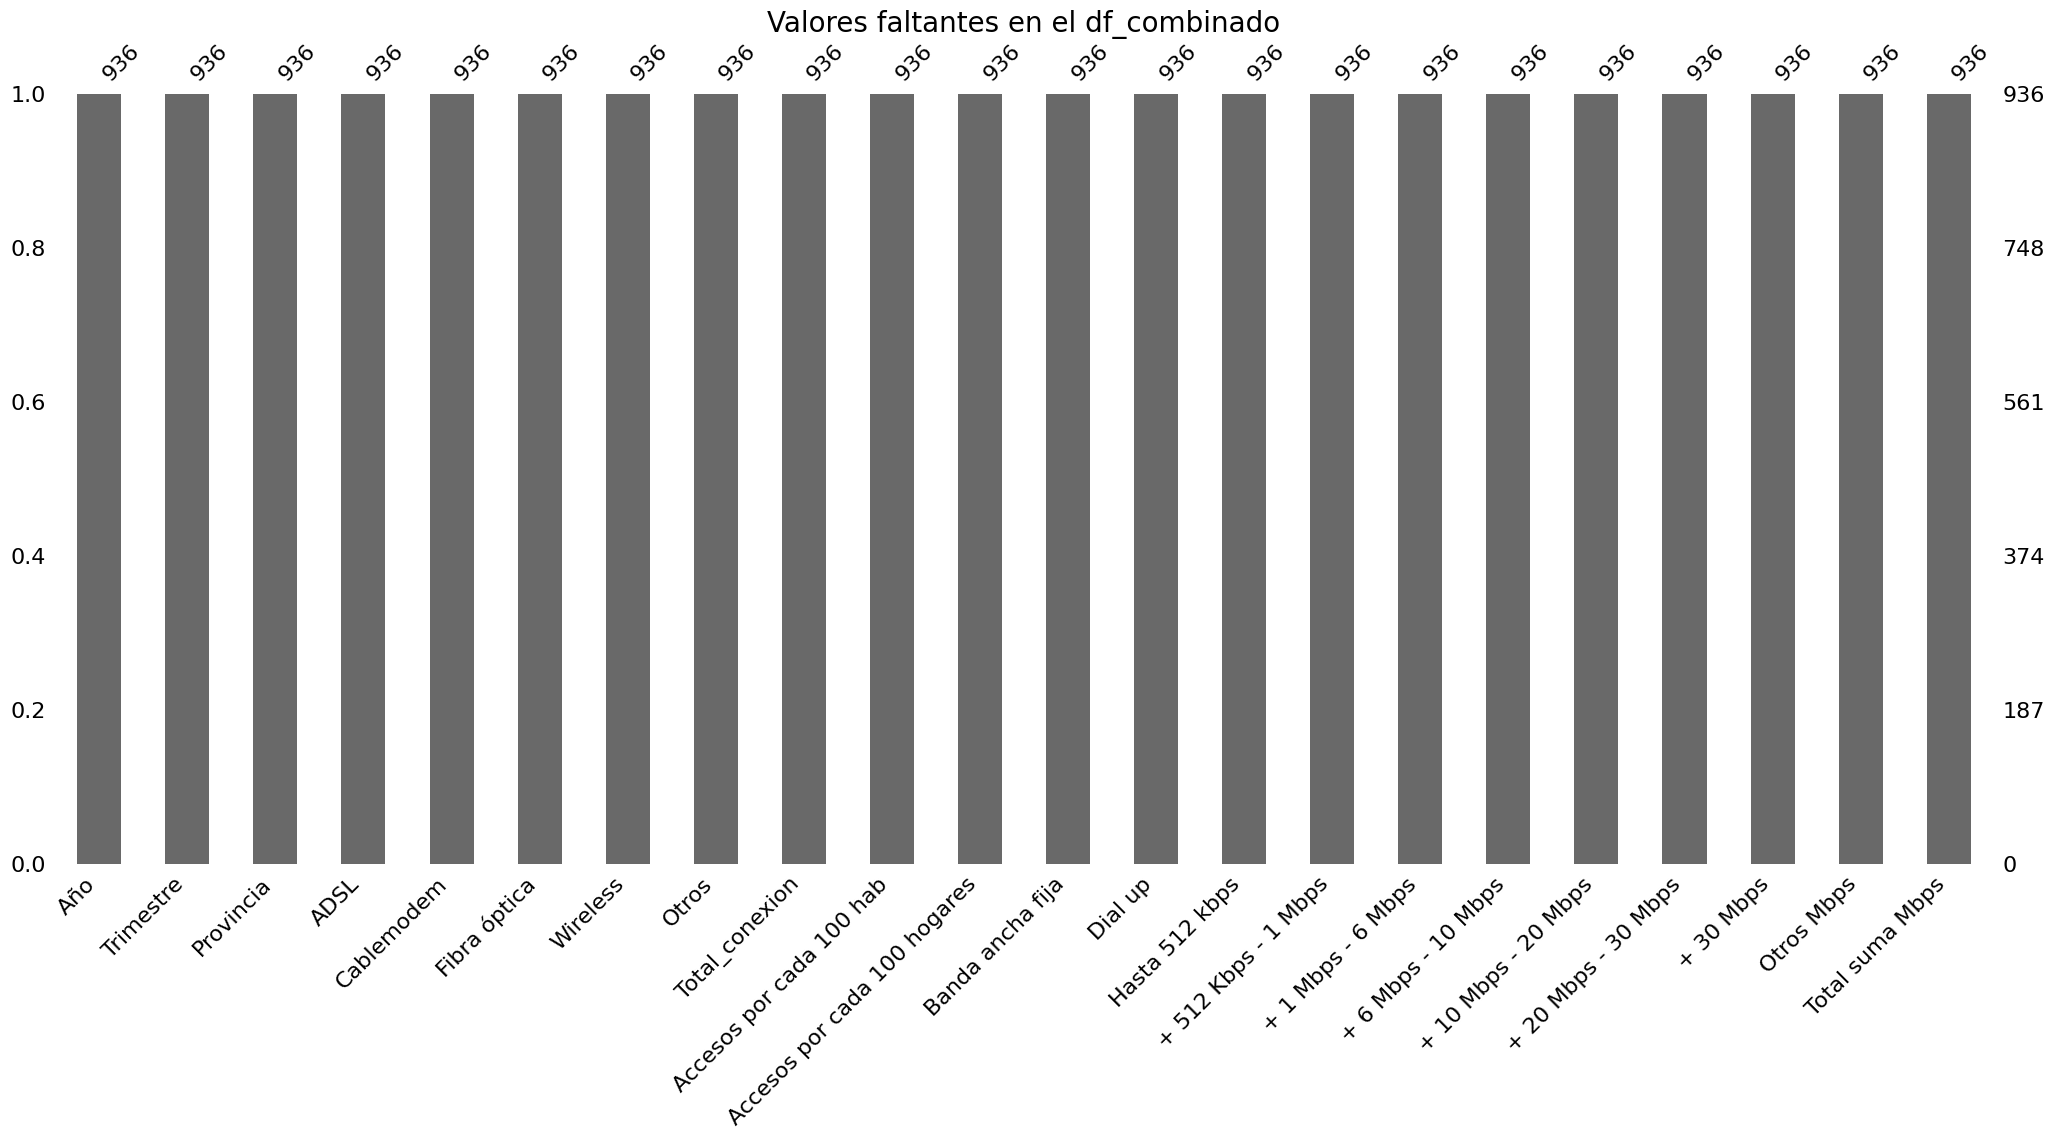

In [5]:
# Revisamos los valores faltantes del df
msno.bar(df_combinado)
plt.title('Valores faltantes en el df_combinado', fontsize=20) 
plt.show() 
# En este caso vemos que todas las columnas contienen la misma cantidad de datos

# Analisis univariado
### Se comienza con el análisis de las variables:

- **ADSL:** (Asymmetric Digital Subscriber Line) es una tecnología de transmisión de datos de banda ancha a través de líneas telefónicas de cobre. Permite una mayor velocidad de descarga en comparación con la velocidad de carga.

- **Cablemodem:** se refiere a la conexión de banda ancha a través de la red de televisión por cable. Usa la infraestructura de cables coaxiales existente para transmitir datos de alta velocidad.
- **Fibra óptica:** es un medio de transmisión de datos que utiliza cables hechos de hilos de vidrio o plástico muy finos. Proporciona una velocidad de conexión muy alta y una menor atenuación de la señal en comparación con otras tecnologías.
- **Wireless:** son las conexiones de banda ancha inalámbricas, donde los dispositivos se conectan a través de señales de radio o redes de área local inalámbricas (WLAN) como Wi-Fi.
- **Otros:** esta categoría incluye conexiones de banda ancha que no se clasifican en las categorías anteriores. Puede incluir tecnologías emergentes o menos comunes de acceso a Internet de alta velocidad.
### Estas tecnologías representan diferentes formas de acceso a Internet de banda ancha que ofrecen velocidades más rápidas y mejor rendimiento en comparación con las conexiones de acceso telefónico tradicionales.

In [6]:
# Se visualizan los estadísticos de las columnas de los tipos de conexión
columnas = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
df_estadisticos = df_combinado[columnas].describe()
print(df_estadisticos)

               ADSL    Cablemodem  Fibra óptica       Wireless         Otros
count  9.360000e+02  9.360000e+02  9.360000e+02     936.000000    936.000000
mean   1.192097e+05  1.798580e+05  4.124215e+04   11754.995726   6409.317308
std    2.436911e+05  4.418283e+05  1.593985e+05   20138.036875  11100.403213
min    3.726000e+03  0.000000e+00  0.000000e+00       0.000000      2.000000
25%    2.158350e+04  1.021200e+04  2.700000e+02     595.000000    321.000000
50%    4.635200e+04  3.880100e+04  1.970500e+03    4805.500000   1879.500000
75%    9.264425e+04  7.419100e+04  2.068675e+04   13431.750000   7229.750000
max    1.586343e+06  2.784175e+06  1.740239e+06  138405.000000  73415.000000


 #### Podemos notar que hay igual cantidad de datos para todos los tipos de conexiones. El promedio de los valores es mayor para ADSL y cablemodem, luego de fibra óptica y finalmente de Wireless y otros tipos de conexión.

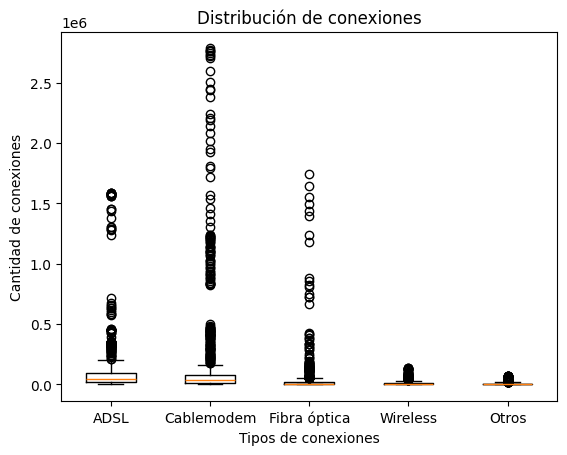

In [7]:
# De forma gráfica:
columnas = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
plt.boxplot(df_combinado[columnas])
plt.ylabel('Cantidad de conexiones')
plt.xlabel('Tipos de conexiones')
plt.title('Distribución de conexiones')
plt.xticks(range(1, len(columnas) + 1), columnas)
plt.show()

#### Vemos que hay una mayor dispersión de datos en cablemodem, seguida de Fibra óptica y ADSL 
#### Revision de las variables:
- Año

- Timestre
- Provincia

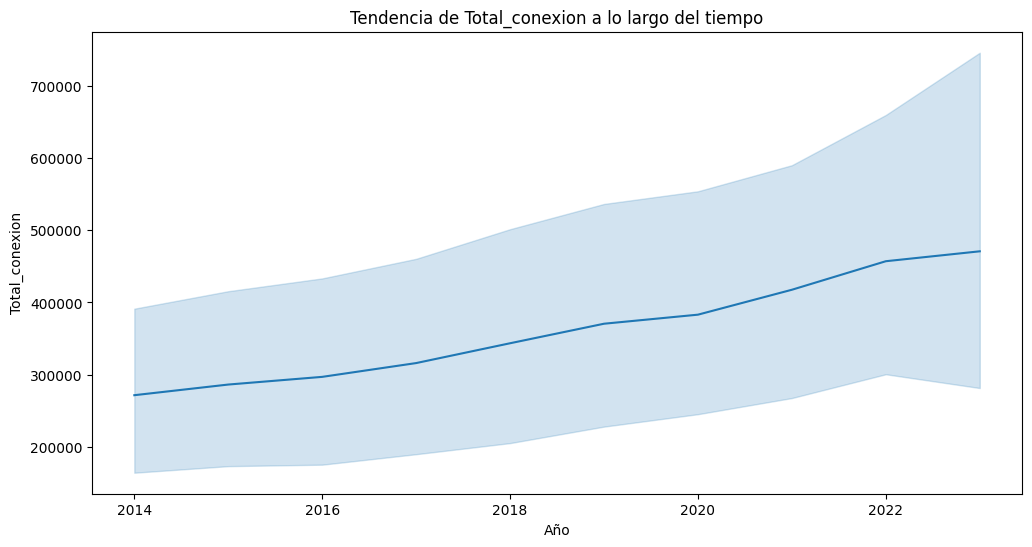

In [8]:
# Gráfico de línea de la variable "Total_conexion" en función del año
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_combinado, x='Año', y='Total_conexion')
plt.title('Tendencia de Total_conexion a lo largo del tiempo')
plt.show()

#### Vemos un incremento de las conexiones a lo largo de los registros.

In [9]:
# Revisamos los datos de "Año", "Trimestre" y "Provincia"
cuenta_años = df_combinado['Año'].value_counts()
cuenta_trimestre = df_combinado['Trimestre'].value_counts()
cuenta_provincia = df_combinado['Provincia'].value_counts()

print("Recuento de valores en la columna 'Año':")
print(cuenta_años)
print("\nRecuento de valores en la columna 'Trimestre':")
print(cuenta_trimestre)
print("\nRecuento de valores en la columna 'Provincia':")
print(cuenta_provincia)

Recuento de valores en la columna 'Año':
Año
2022    96
2021    96
2017    96
2020    96
2019    96
2018    96
2015    96
2016    96
2014    96
2023    72
Name: count, dtype: int64

Recuento de valores en la columna 'Trimestre':
Trimestre
3    240
2    240
1    240
4    216
Name: count, dtype: int64

Recuento de valores en la columna 'Provincia':
Provincia
Buenos Aires           39
Capital Federal        39
Catamarca              39
Chaco                  39
Chubut                 39
Córdoba                39
Corrientes             39
Entre Ríos             39
Formosa                39
Jujuy                  39
La Pampa               39
La Rioja               39
Mendoza                39
Misiones               39
Neuquén                39
Río Negro              39
Salta                  39
San Juan               39
San Luis               39
Santa Cruz             39
Santa Fe               39
Santiago Del Estero    39
Tierra Del Fuego       39
Tucumán                39
Name: count, dtyp

#### El año 2023 tiene la menor cantidad de registros (72), y tambien hay menor cantidad de datos para el 4to trimestre (216) respecto al valor de otros trimestres (240).
#### Las variables:
- Accesos por cada 100 hab: Número de accesos a Internet por cada 100 habitantes en la provincia para el año y trimestre específicos.

- Accesos por cada 100 hogares: Número de accesos a Internet por cada 100 hogares en la provincia para el año y trimestre específicos.

In [10]:
# Revision de las variables
print(df_combinado['Accesos por cada 100 hab'].describe())
print(df_combinado['Accesos por cada 100 hogares'].describe())

count    936.000000
mean      14.738248
std        9.140547
min        2.000000
25%        8.000000
50%       13.000000
75%       19.000000
max       52.000000
Name: Accesos por cada 100 hab, dtype: float64
count    936.000000
mean      50.639957
std       23.756376
min        9.000000
25%       32.000000
50%       47.500000
75%       64.000000
max      124.000000
Name: Accesos por cada 100 hogares, dtype: float64


#### Al evaluar los estadísticos de los "accesos por cada 100 habitantes" tiene una media de 15.24 mientras que los "accesos por cada 100 hogares" es de 51.14, con un mayor valor de máximo y una mayor dispersión de los datos.

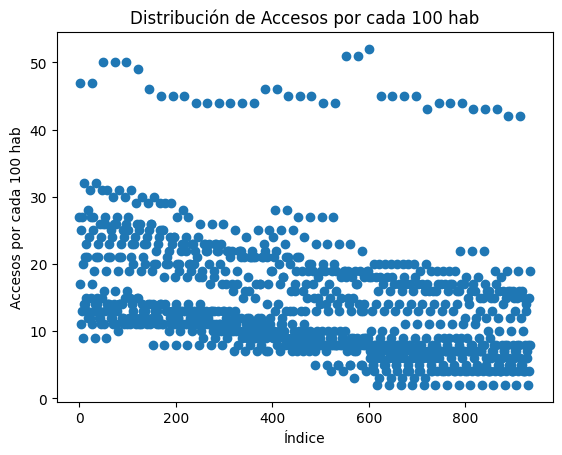

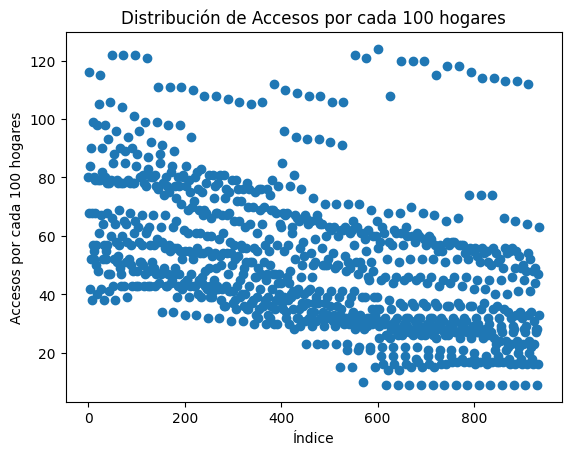

In [11]:
# De forma gráfica podemos notar la distribución de los datos: 
plt.plot(df_combinado['Accesos por cada 100 hab'], 'o')
plt.xlabel('Índice')
plt.ylabel('Accesos por cada 100 hab')
plt.title('Distribución de Accesos por cada 100 hab')
plt.show()

plt.plot(df_combinado['Accesos por cada 100 hogares'], 'o')
plt.xlabel('Índice')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Distribución de Accesos por cada 100 hogares')
plt.show()

#### Revision de las variables:
- **Banda ancha fija:** Número de conexiones de banda ancha fija. Se refiere a conexiones a Internet de alta velocidad que tienen una capacidad de transmisión de datos mayor que las conexiones dial-up. Proporciona una mayor capacidad de carga y descarga de datos, lo que permite una experiencia de navegación y descarga más rápida. Hay varias tecnologías de banda ancha disponibles, como la fibra óptica, el cable coaxial, la tecnología DSL (Digital Subscriber Line) y la conexión inalámbrica, que incluye el acceso móvil y la banda ancha satelital. Estas tecnologías ofrecen velocidades de conexión mucho más rápidas en comparación con las conexiones dial-up.

- **Dial up:** Número de conexiones de tipo Dial up en la provincia para el año y trimestre específicos. Con una conexión dial-up, se utiliza un módem para establecer una conexión a través de la red telefónica con un proveedor de servicios de Internet (ISP). La velocidad de conexión es baja en comparación con las tecnologías más modernas, y generalmente se limita a velocidades de transmisión de datos de hasta 56 kilobits por segundo (Kbps). El acceso a Internet a través de dial-up ha sido ampliamente reemplazado por tecnologías de banda ancha más rápidas y confiables.

In [12]:
# Revision de las variables
print(df_combinado['Banda ancha fija'].describe())
print(df_combinado['Dial up'].describe())

count    9.360000e+02
mean     3.575477e+05
std      7.691205e+05
min      1.219300e+04
25%      5.612550e+04
50%      1.086210e+05
75%      1.856278e+05
max      4.962337e+06
Name: Banda ancha fija, dtype: float64
count      936.000000
mean       926.505342
std       2329.815548
min          0.000000
25%          5.000000
50%        137.000000
75%        619.000000
max      15229.000000
Name: Dial up, dtype: float64


#### La variable "Banda ancha" presenta mas dispersión y mayor promedio. Mientras que la variable "Dial up" cuenta con menores valores promedio y de distribución de valores.

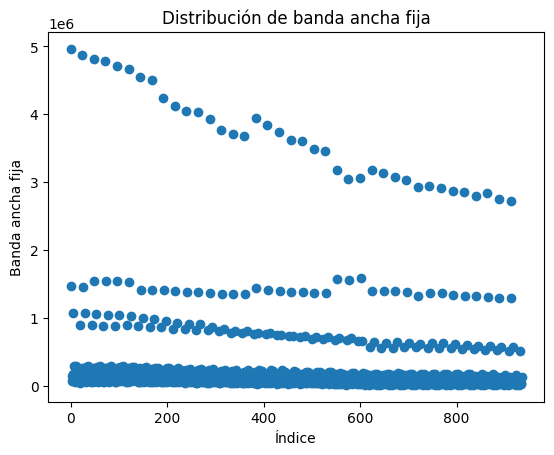

In [13]:
# De forma gráfica podemos notar la distribución de los datos: 
plt.plot(df_combinado['Banda ancha fija'], 'o')
plt.xlabel('Índice')
plt.ylabel('Banda ancha fija')
plt.title('Distribución de banda ancha fija')
plt.show()

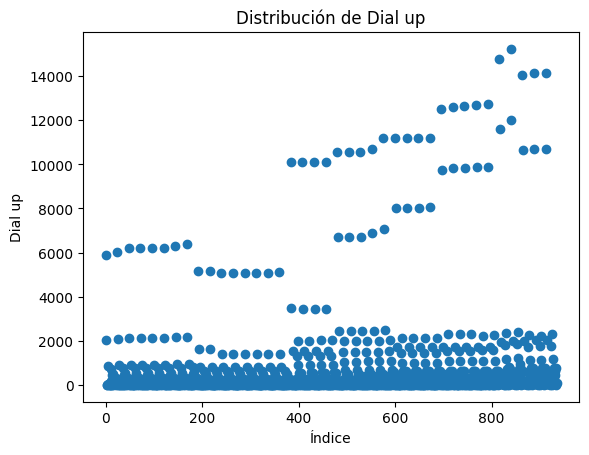

In [14]:
# De forma análoga con Dial up: 
plt.plot(df_combinado['Dial up'], 'o')
plt.xlabel('Índice')
plt.ylabel('Dial up')
plt.title('Distribución de Dial up')
plt.show()

#### Para las ultimas variables de este dataframe:
- Hasta 512 kbps

- 512 Kbps - 1 Mbps
- 1 Mbps - 6 Mbps
- 6 Mbps - 10 Mbps
- 10 Mbps - 20 Mbps
- 20 Mbps - 30 Mbps
- 30 Mbps
- Otros Mbps: Número de conexiones con velocidad de otros tipos en cada provincia.
- Total suma Mbps: Total de la suma de todas las conexiones de Internet.

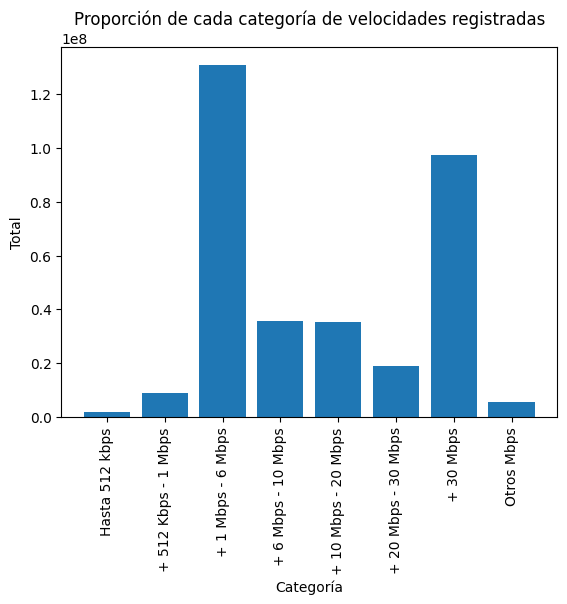

In [15]:
# De forma gráfica podemos ver la cantidad de cada velocidad registradas en el dataset
sizes = df_combinado[['Hasta 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
                      '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'Otros Mbps']].sum()

labels = sizes.index
values = sizes.values

plt.bar(labels, values)
plt.xlabel('Categoría')
plt.ylabel('Total')
plt.title('Proporción de cada categoría de velocidades registradas')
plt.xticks(rotation=90)
plt.show()

#### En este caso la mayor cantidades de valores estan entre las velocidades de "1 a 6 Mbps" y "+ 30 Mbps".

In [16]:
# De forma más profunda los análisis estadísticos de estas variables son:
estadistica_vel = df_combinado[['Hasta 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
                           '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'Otros Mbps', 'Total suma Mbps']].describe()

estadisticas_totales= pd.concat([estadistica_vel])
print(estadisticas_totales)

       Hasta 512 kbps  + 512 Kbps - 1 Mbps  + 1 Mbps - 6 Mbps  \
count      936.000000           936.000000       9.360000e+02   
mean      2005.464744          9452.683761       1.397443e+05   
std      13024.756322         21248.248296       3.318811e+05   
min          6.000000             0.000000       1.617000e+03   
25%         39.000000           333.000000       2.496475e+04   
50%        107.000000          2369.500000       4.563150e+04   
75%        468.000000          7419.000000       8.488875e+04   
max     238920.000000        171244.000000       2.299705e+06   

       + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  + 20 Mbps - 30 Mbps  \
count          936.000000           936.000000           936.000000   
mean         38044.676282         37514.867521         20340.714744   
std          64811.881781         90351.227742         71311.992102   
min              0.000000             0.000000             0.000000   
25%           3369.000000          1941.500000            3

## Analisis bivariado - multivariado

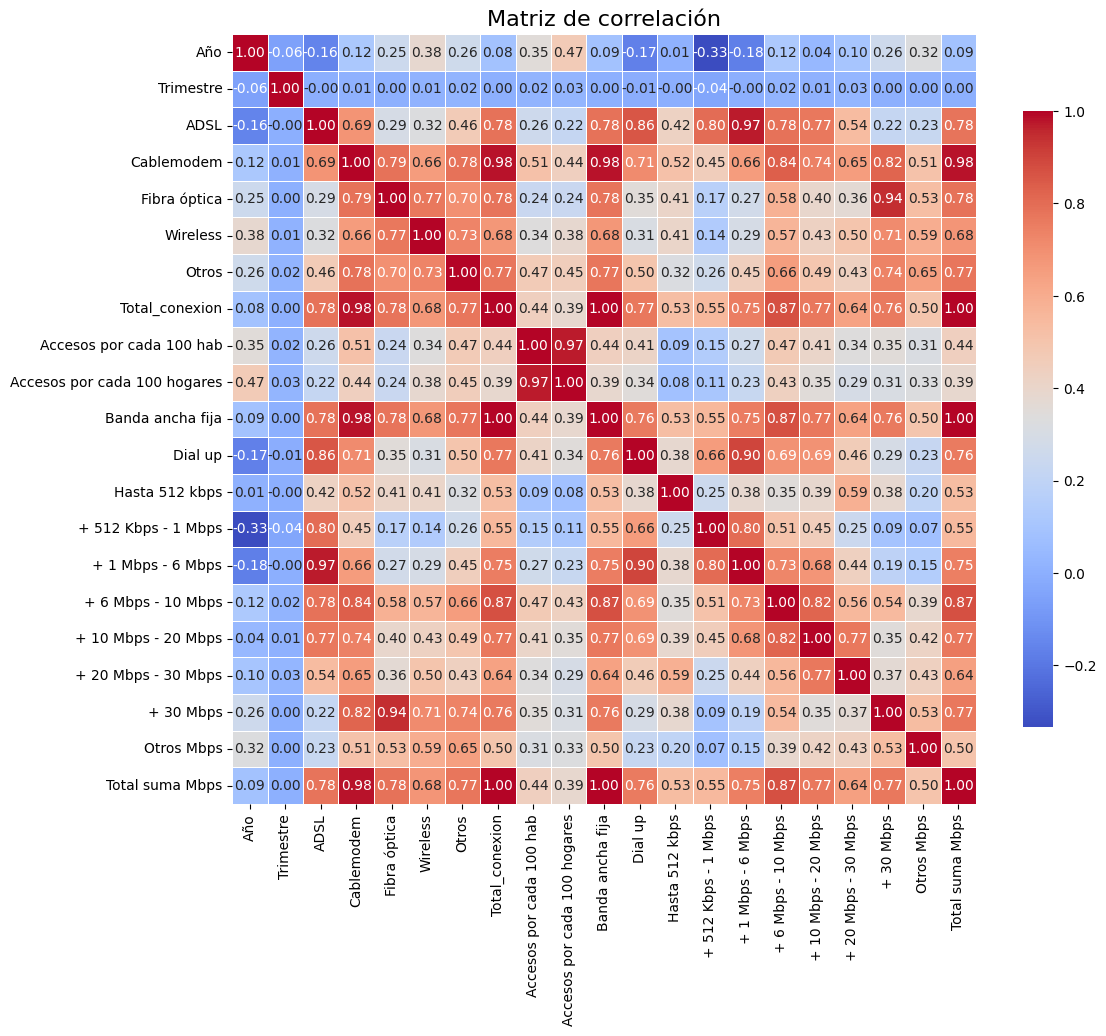

In [17]:
corr_matrix = df_combinado.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            linewidths=0.5, linecolor='white', cbar_kws={"shrink": .8})
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Matriz de correlación', fontsize=16)
plt.show()

### Para observar mejor las correlaciones se agrupan como previamente fueron tratadas

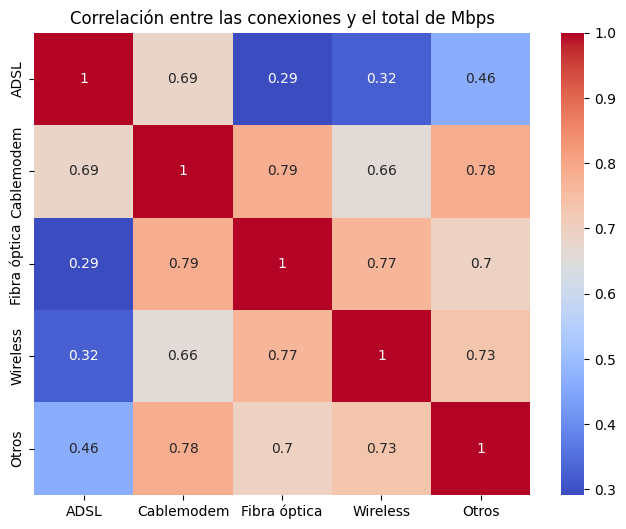

In [18]:
# Gráfico de correlación de las conexiones con el total de Mbps
conn_types = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
df_corr = df_combinado[conn_types]
corr_matrix = df_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre las conexiones y el total de Mbps')
plt.show()

In [19]:
# Otra forma de visualizar la correlacion de estas variables
variables = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
correlation_matrix = np.corrcoef(df_combinado[variables].values.T)

correlation_pairs = []
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        coef = correlation_matrix[i, j]
        pair = (variables[i], variables[j], coef)
        correlation_pairs.append(pair)
sorted_pairs = sorted(correlation_pairs, key=lambda x: x[2], reverse=True)
for pair in sorted_pairs:
    var1, var2, coef = pair
    print(f"Correlación de Pearson entre {var1} y {var2}: {coef:.2f}")

Correlación de Pearson entre Cablemodem y Fibra óptica: 0.79
Correlación de Pearson entre Cablemodem y Otros: 0.78
Correlación de Pearson entre Fibra óptica y Wireless: 0.77
Correlación de Pearson entre Wireless y Otros: 0.73
Correlación de Pearson entre Fibra óptica y Otros: 0.70
Correlación de Pearson entre ADSL y Cablemodem: 0.69
Correlación de Pearson entre Cablemodem y Wireless: 0.66
Correlación de Pearson entre ADSL y Otros: 0.46
Correlación de Pearson entre ADSL y Wireless: 0.32
Correlación de Pearson entre ADSL y Fibra óptica: 0.29


#### Algunas formas de conexión presentan nuemeros elevados de coeficiente de correlacion de Pearson entre varias parejas de variables, como Cablemodem y Fibra óptica, Fibra óptica y Wireless, ADSL y Cablemodem, entre otros.

#### El análisis de estas conexiones a lo largo de los años nos va a mostrar un incremento de las conexiones "Cablemodem" y una marcada disminución de las conexiones "ADSL".

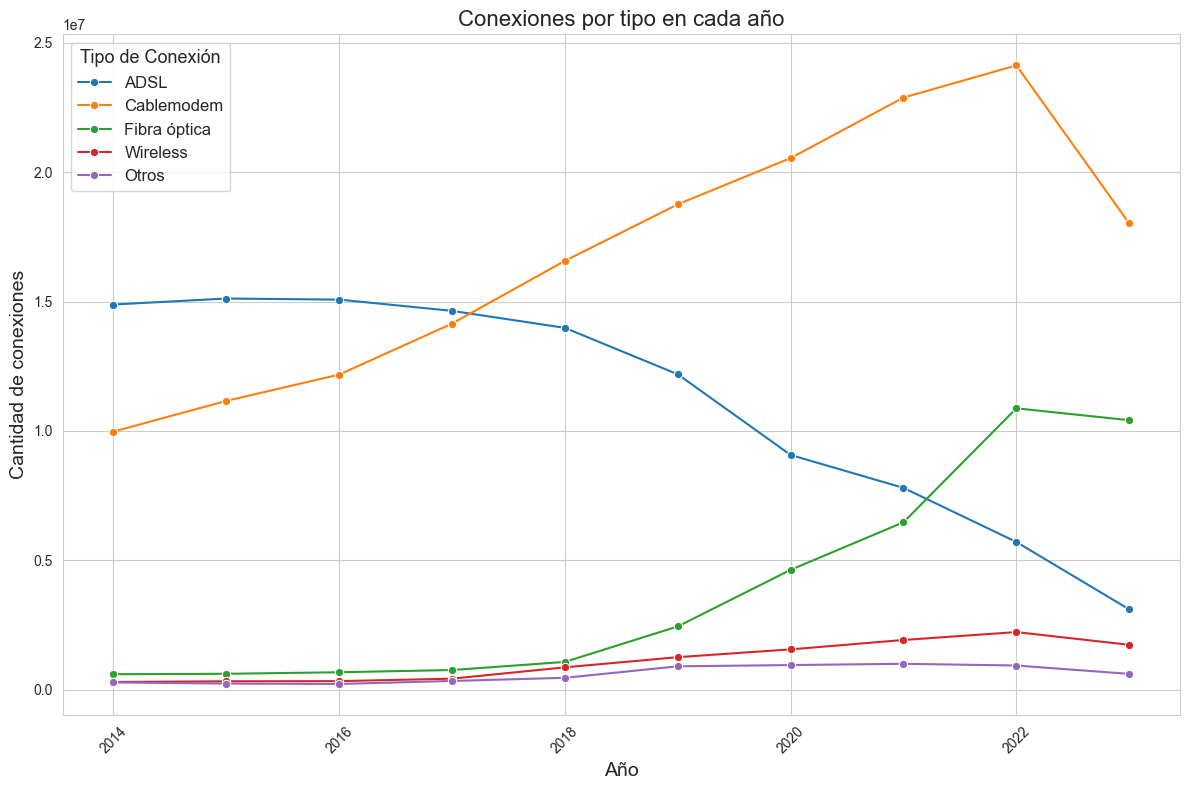

In [20]:
# Gráfico de líneas múltiples para comparar las conexiones por tipo en cada año
conn_types = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
df_conn_types = df_combinado.groupby('Año')[conn_types].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

for conn_type in conn_types:
    sns.lineplot(data=df_conn_types, x='Año', y=conn_type, label=conn_type, marker='o')

plt.title('Conexiones por tipo en cada año', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Cantidad de conexiones', fontsize=14)
plt.legend(title='Tipo de Conexión', fontsize=12, title_fontsize='13')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

#### Análisis de los valores registrados para el último año

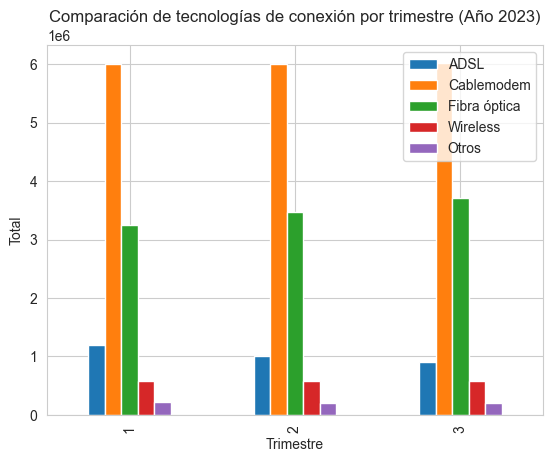

In [21]:
df_2023 = df_combinado[df_combinado['Año'] == 2023]

df_grouped = df_2023.groupby('Trimestre')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()
df_grouped.plot(kind='bar')
plt.xlabel('Trimestre')
plt.ylabel('Total')
plt.title('Comparación de tecnologías de conexión por trimestre (Año 2023)')
plt.show()

#### Notamos que hay una mayor preponderancia de conexiones de "Cablemodem", seguida por las de "Fibra óptica"

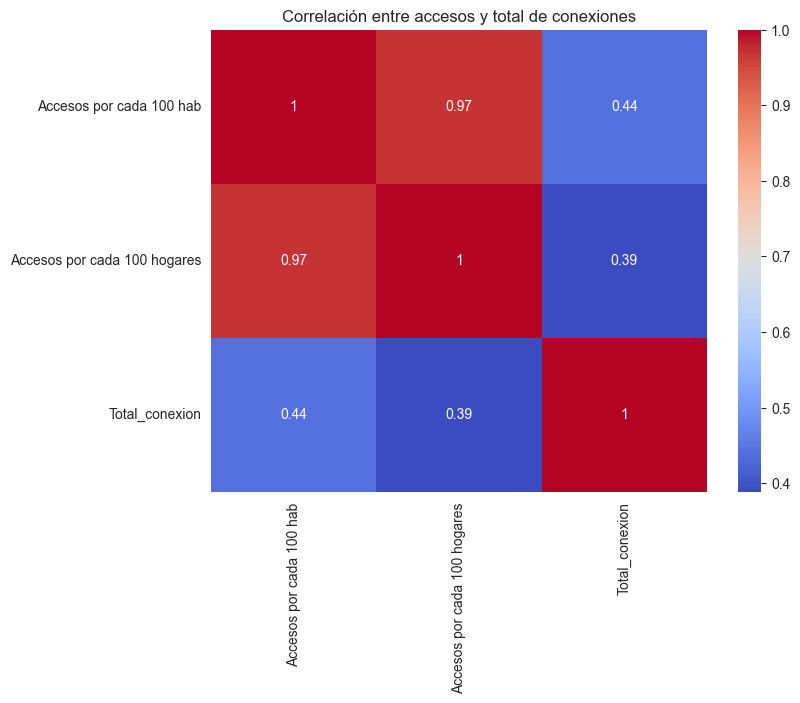

In [22]:
# Gráfico de correlación de los accesos
conn_types = ['Accesos por cada 100 hab', 'Accesos por cada 100 hogares', 'Total_conexion']
df_corr = df_combinado[conn_types]
corr_matrix = df_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre accesos y total de conexiones')
plt.show()

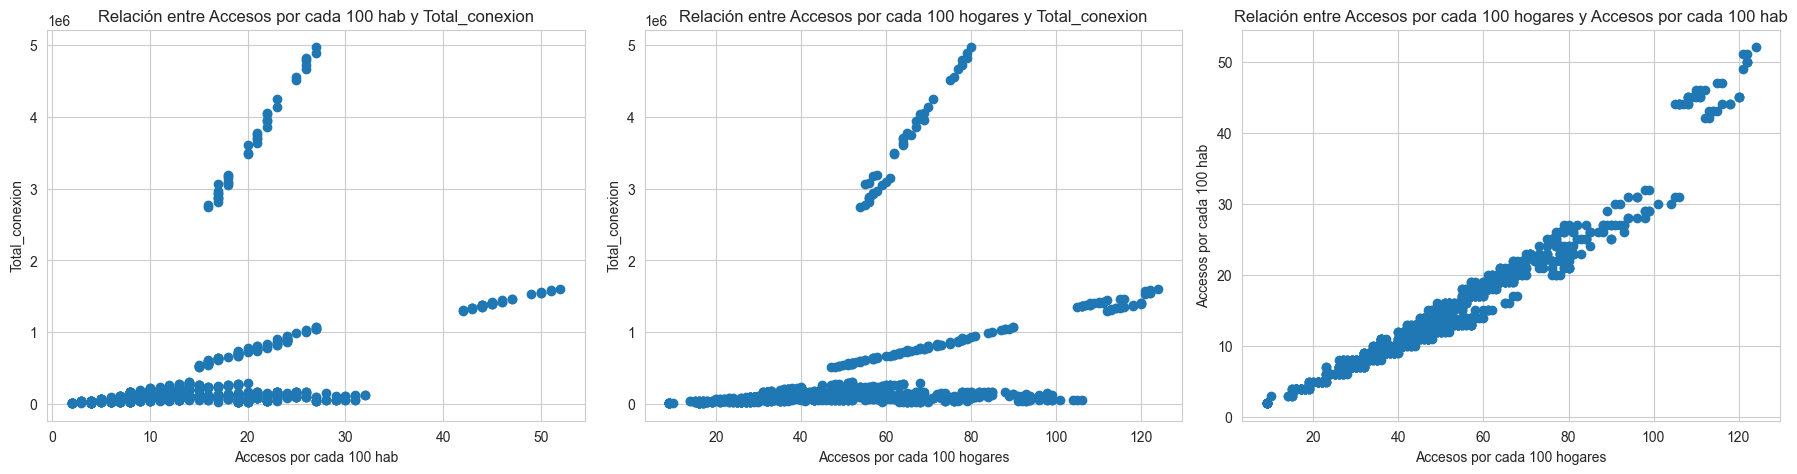

In [23]:
# De forma gráfica
# se crea una figura con tres subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Primer gráfico
axes[0].scatter(df_combinado['Accesos por cada 100 hab'], df_combinado['Total_conexion'])
axes[0].set_xlabel('Accesos por cada 100 hab')
axes[0].set_ylabel('Total_conexion')
axes[0].set_title('Relación entre Accesos por cada 100 hab y Total_conexion')

# Segundo gráfico
axes[1].scatter(df_combinado['Accesos por cada 100 hogares'], df_combinado['Total_conexion'])
axes[1].set_xlabel('Accesos por cada 100 hogares')
axes[1].set_ylabel('Total_conexion')
axes[1].set_title('Relación entre Accesos por cada 100 hogares y Total_conexion')

# Tercer gráfico
axes[2].scatter(df_combinado['Accesos por cada 100 hogares'], df_combinado['Accesos por cada 100 hab'])
axes[2].set_xlabel('Accesos por cada 100 hogares')
axes[2].set_ylabel('Accesos por cada 100 hab')
axes[2].set_title('Relación entre Accesos por cada 100 hogares y Accesos por cada 100 hab')

# Ajustar los subplots y mostrar el gráfico
plt.tight_layout()
plt.show()

#### Habria una relación lineal entre los accesos por cada 100 hogares y los accesos por cada 100 habitantes.

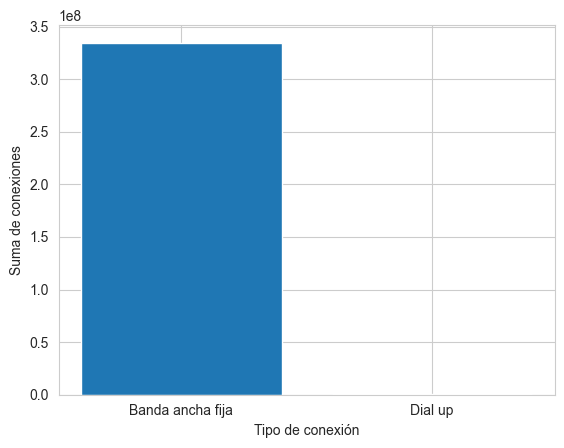

In [24]:
# Se calcula la suma de conexiones de "Banda ancha fija" y "Dial up"
suma_banda_ancha = df_combinado["Banda ancha fija"].sum()
suma_dial_up = df_combinado["Dial up"].sum()

# El grafico
plt.bar(["Banda ancha fija", "Dial up"], [suma_banda_ancha, suma_dial_up])
plt.xlabel("Tipo de conexión")
plt.ylabel("Suma de conexiones")
plt.show()

#### Hay mayor cantidad de conexiones de banda ancha

In [25]:
# La correlación entre "Banda ancha fija" y "Dial up"
correlation = df_combinado["Banda ancha fija"].corr(df_combinado["Dial up"])
print("Correlación: ", correlation)

Correlación:  0.7645517693320375


#### Y parecen tener una correlación positiva entre sus valores

In [26]:
# Suponiendo que df_combinado ya está definido
df_combinado['Banda ancha fija'] = df_combinado['Banda ancha fija'].fillna(df_combinado['Banda ancha fija'].mean())
df_combinado['Dial up'] = df_combinado['Dial up'].fillna(df_combinado['Dial up'].mean())

# Realizar la prueba t de Student entre "Banda ancha fija" y "Dial up"
t_stat, p_value = ttest_ind(df_combinado["Banda ancha fija"], df_combinado["Dial up"])

print("Estadístico t:", t_stat)
print("Valor p:", p_value)

Estadístico t: 14.1856304141517
Valor p: 1.8539542419671838e-43


#### Con una clara diferencia significativa entre las medias de las variables "Banda ancha fija" y "Dial up", y esta diferencia no se puede atribuir simplemente al azar.

<Axes: >

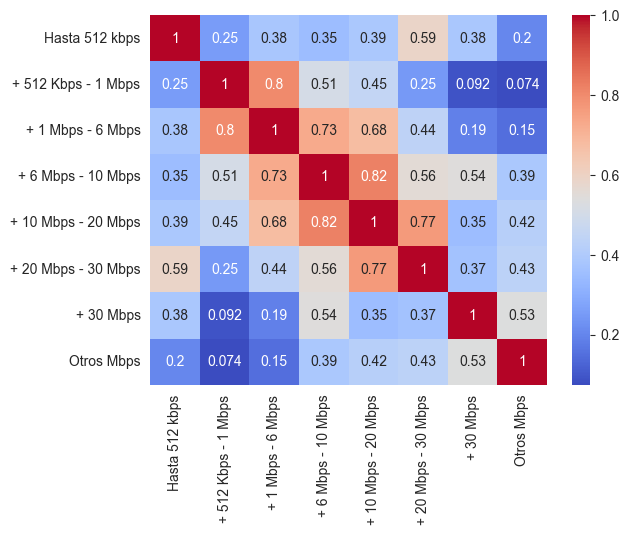

In [27]:
# Se arma un subconjunto del DataFrame con las variables de interés
subset = df_combinado[['Hasta 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'Otros Mbps']]

# Calcular la matriz de correlación
correlation_matrix = subset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

#### Hay algunas velocidades que parecerían tener algún grado de correlación

_________________________________________________________________________________________________________________________________________________________________________________________________________________________________

# Dataframe: "df_nacional"
### El DataFrame "df_nacional" contiene información sobre las conexiones de Internet en diferentes provincias a lo largo de varios años y trimestres a nivel nacional.

In [28]:
# Carga del archivo:
df_nacional = pd.read_csv(r"Datasets con ETL\df_nacional.csv")
df_nacional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        38 non-null     int64  
 1   Trimestre                  38 non-null     int64  
 2   Banda ancha fija           38 non-null     int64  
 3   Dial up                    38 non-null     int64  
 4   Mbps (Media de bajada)     38 non-null     float64
 5   Hasta 512 kbps             38 non-null     float64
 6   Entre 512 Kbps y 1 Mbps    38 non-null     float64
 7   Entre 1 Mbps y 6 Mbps      38 non-null     float64
 8   Entre 6 Mbps y 10 Mbps     38 non-null     float64
 9   Entre 10 Mbps y 20 Mbps    38 non-null     float64
 10  Entre 20 Mbps y 30 Mbps    38 non-null     float64
 11  Más de 30 Mbps             38 non-null     float64
 12  Otros Mbps                 38 non-null     float64
 13  Ingresos (miles de pesos)  38 non-null     float64
 

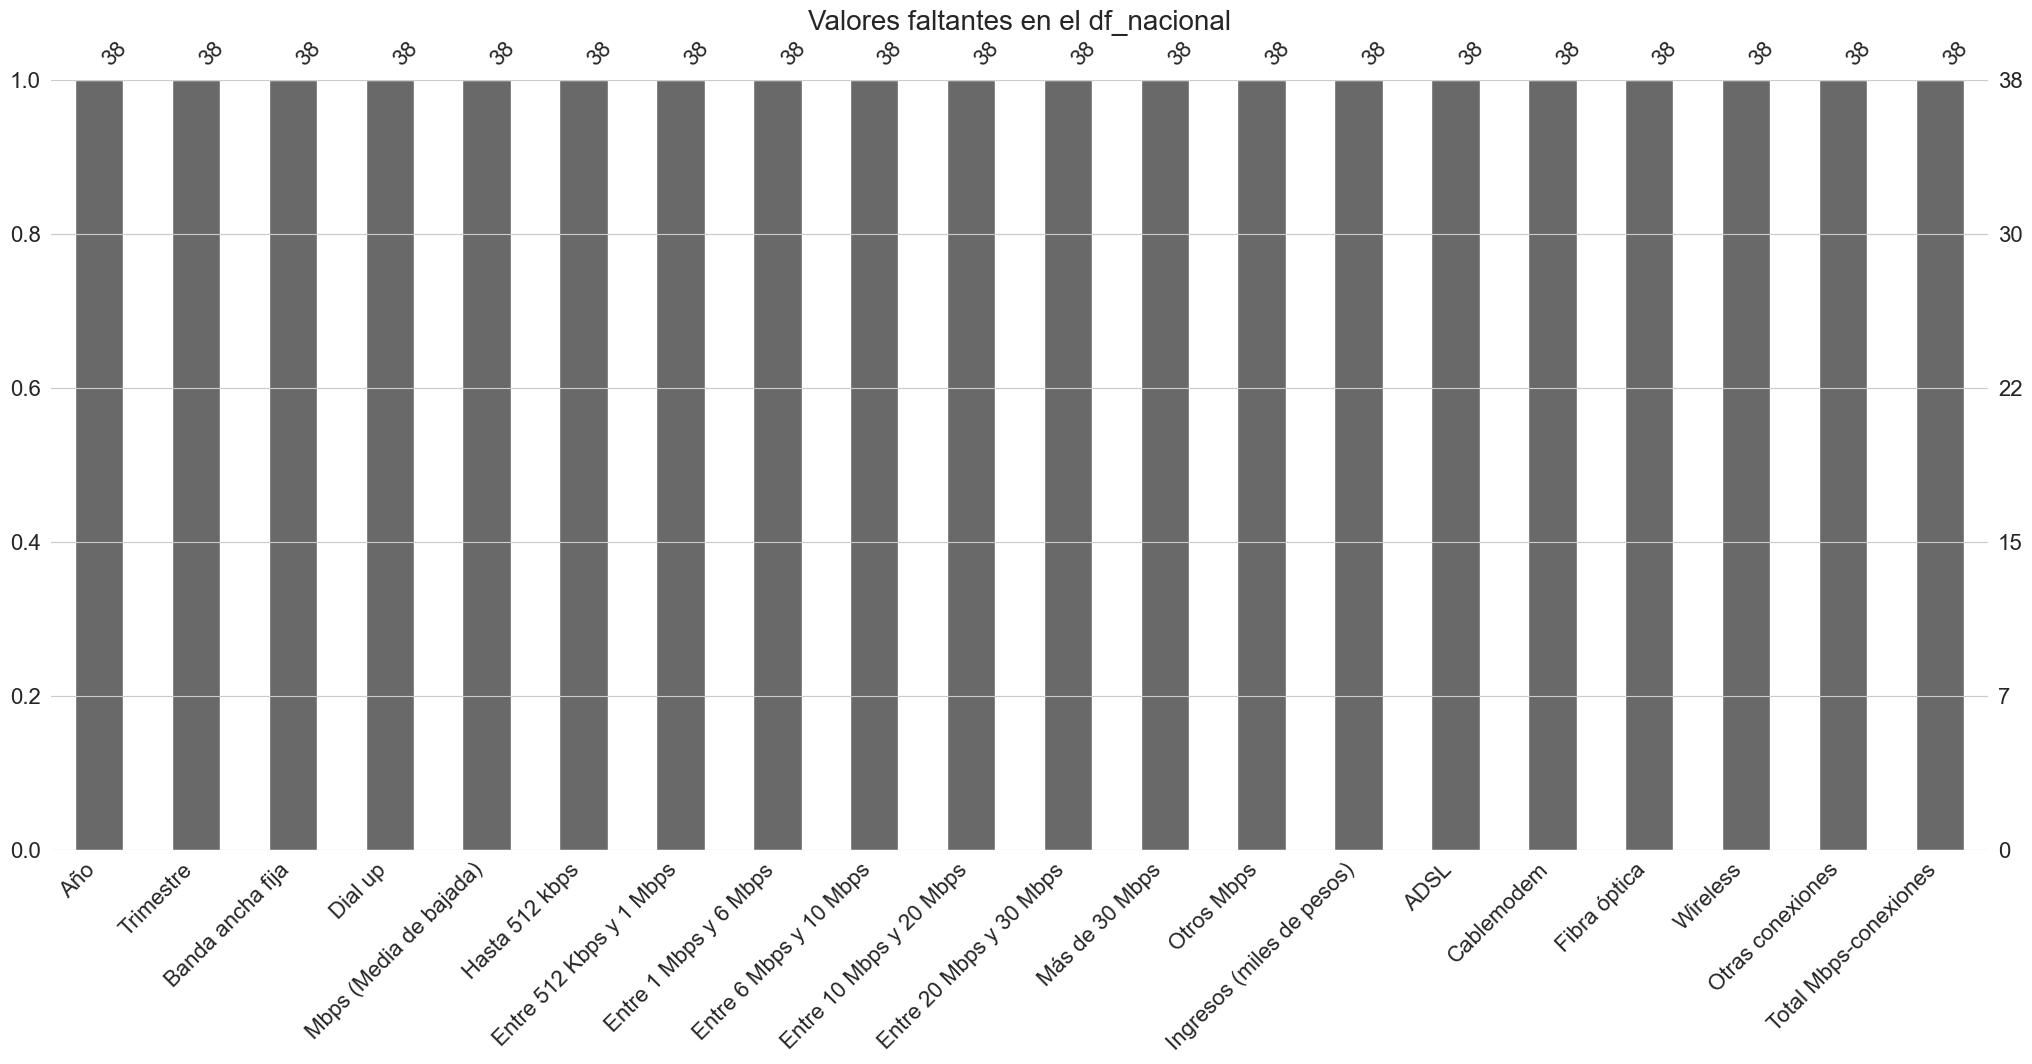

In [29]:
# Revisamos los valores faltantes del df
msno.bar(df_nacional)
plt.title('Valores faltantes en el df_nacional', fontsize=20) 
plt.show() # nuevamente vemos que no hay valores faltantes

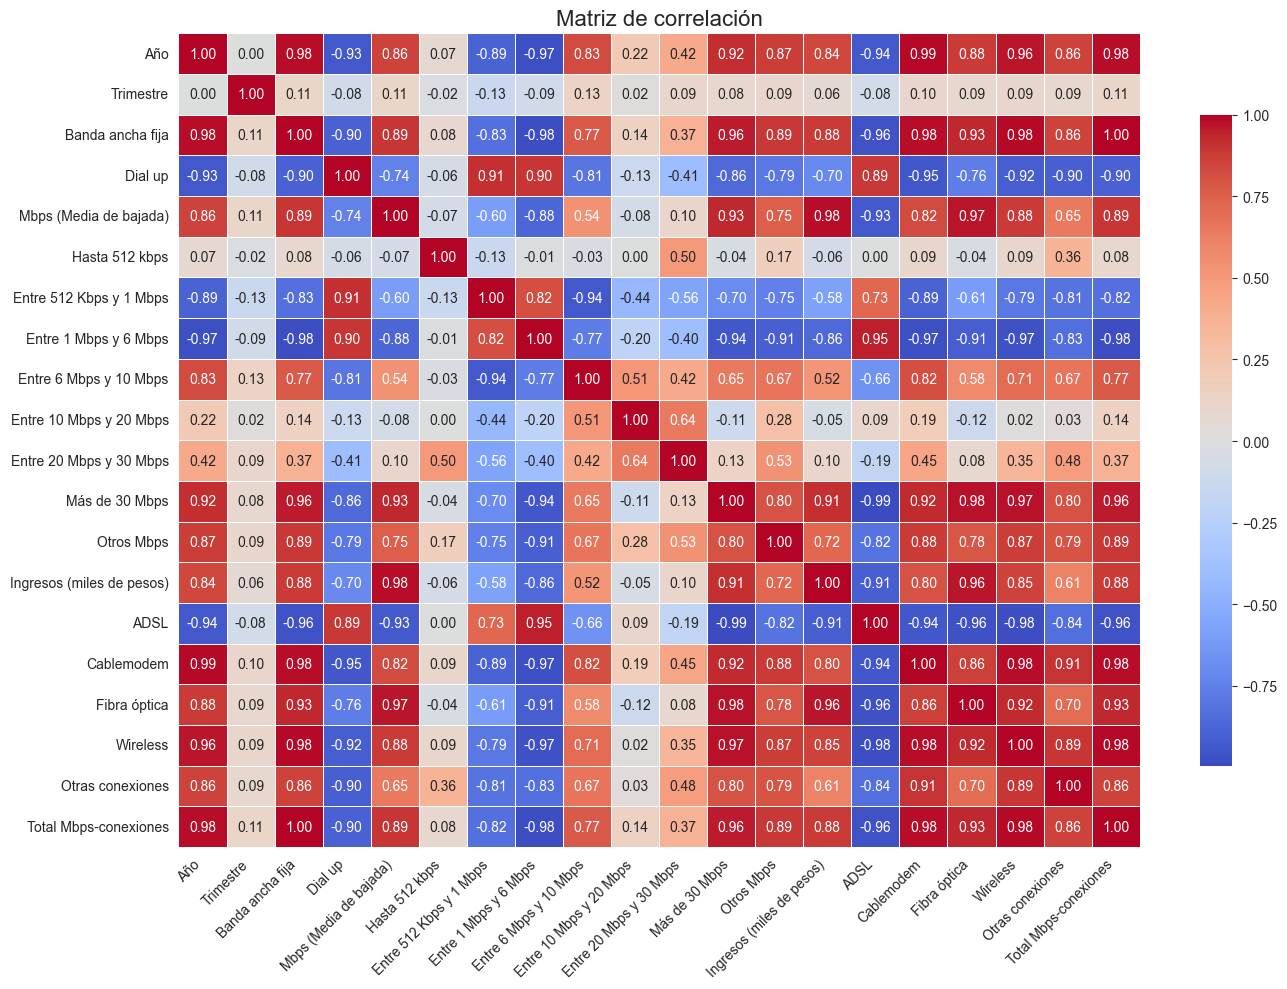

In [30]:
# Si se ejecuta la correlacion para las variables numericas
df_numeric = df_nacional.select_dtypes(include='number')
correlation_matrix = df_numeric.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(14, 10))
sns.set_style("whitegrid")

heatmap = sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                      linewidths=0.5, linecolor='white', cbar_kws={"shrink": .8})

plt.title('Matriz de correlación', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

#### Se ve una zona de mayor correlación por lo que se profundiza en ellas:

In [31]:
# Se visualizan los estadísticos de las columnas de los tipos de conexión
columnas = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otras conexiones']
df_estadisticos = df_nacional[columnas].describe()
print(df_estadisticos)

               ADSL    Cablemodem  Fibra óptica       Wireless  \
count  3.800000e+01  3.800000e+01  3.800000e+01      38.000000   
mean   2.885123e+06  4.272223e+06  9.500126e+05  274369.184211   
std    9.658437e+05  1.283680e+06  1.052115e+06  189977.419098   
min    8.978950e+05  2.407330e+06  1.391870e+05   70749.000000   
25%    2.184896e+06  3.057668e+06  1.686155e+05   85181.750000   
50%    3.425237e+06  4.276001e+06  3.176895e+05  255240.000000   
75%    3.720786e+06  5.411542e+06  1.350032e+06  431299.500000   
max    3.803024e+06  6.073426e+06  3.708718e+06  581823.000000   

       Otras conexiones  
count         38.000000  
mean      152217.973684  
std        84010.762485  
min        54300.000000  
25%        67046.000000  
50%       149064.500000  
75%       244069.500000  
max       265328.000000  


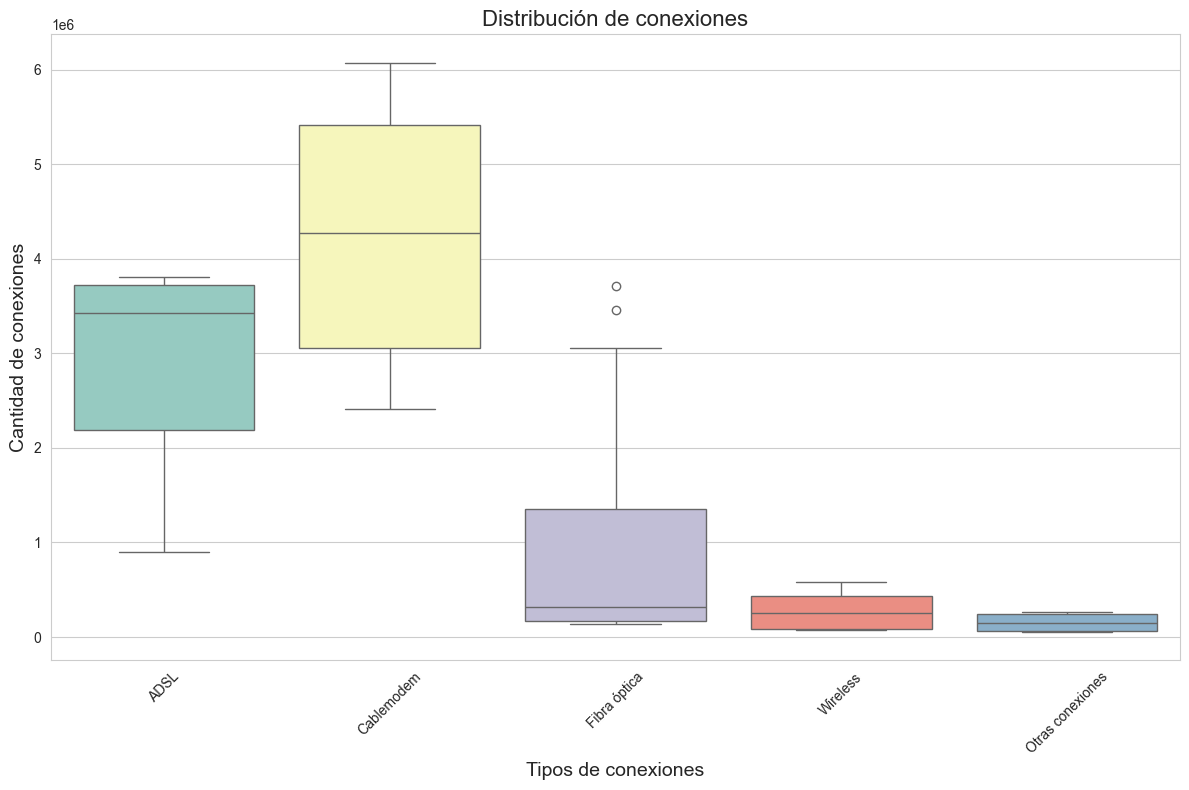

In [32]:
# De forma gráfica:
columnas = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otras conexiones']
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.boxplot(data=df_nacional[columnas], palette="Set3")
plt.ylabel('Cantidad de conexiones', fontsize=14)
plt.xlabel('Tipos de conexiones', fontsize=14)
plt.title('Distribución de conexiones', fontsize=16)
plt.xticks(range(len(columnas)), columnas, rotation=45)
plt.tight_layout()

plt.show()

#### Tal como se observó en el dataset "df_combinado", hay mayores valores para las conexiones de "cable modem", seguida por "ADSL" y "Fibra óptica".

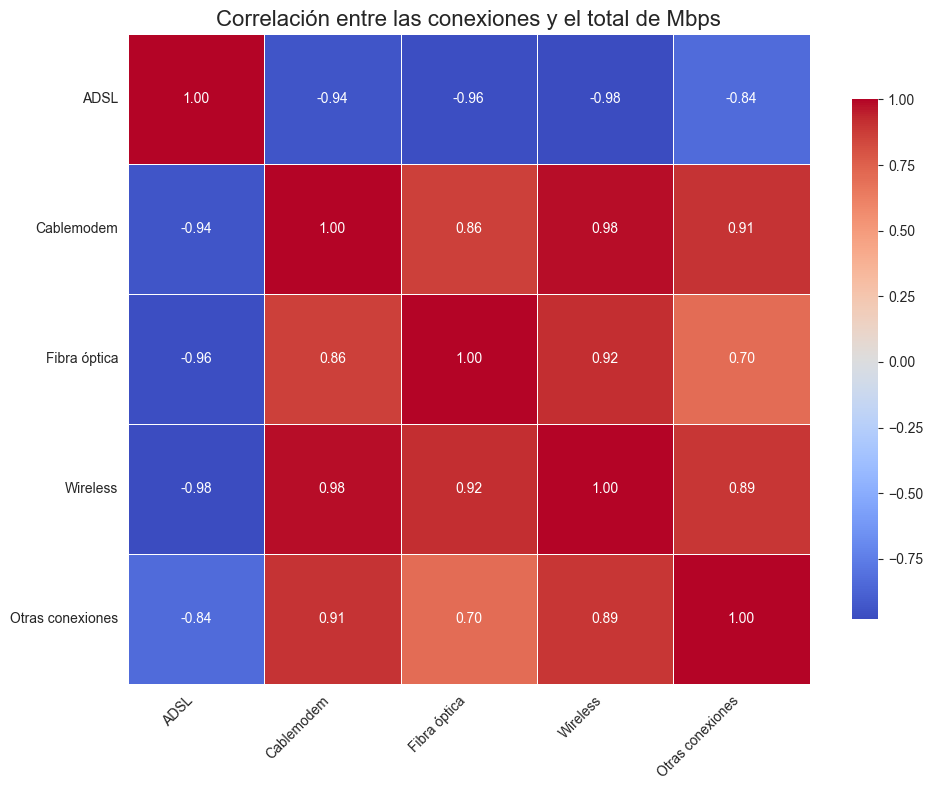

In [33]:
# Gráfico de correlación de las conexiones con el total de Mbps
conn_types =  ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otras conexiones']
df_corr = df_nacional[conn_types]
corr_matrix = df_corr.corr()
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
heatmap = sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                      linewidths=0.5, linecolor='white', cbar_kws={"shrink": .8})
plt.title('Correlación entre las conexiones y el total de Mbps', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

#### Las variables parecen tener un mayor nivel de correlación, exceptuando ADSL con todas las variables con las que presenta una clara correlacion negativa.

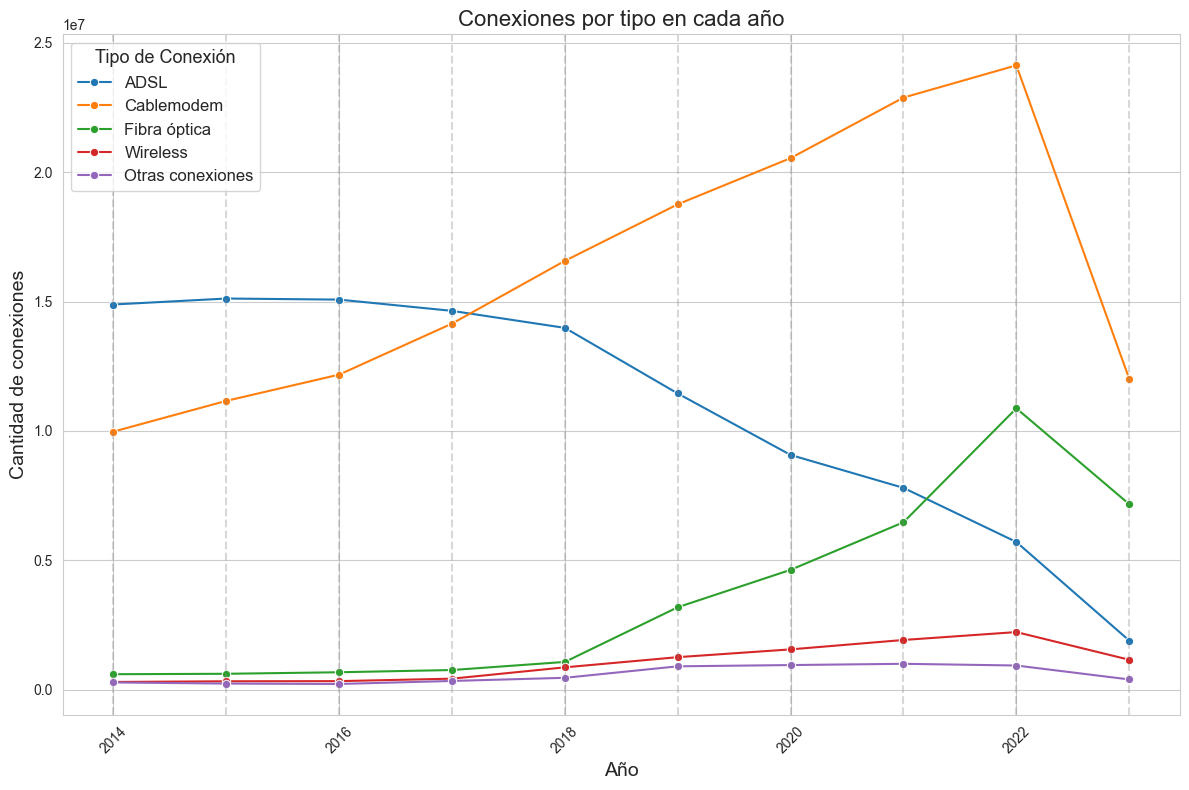

In [34]:
# Gráfico de líneas múltiples para comparar las conexiones por tipo en cada año
conn_types = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otras conexiones']
df_conn_types = df_nacional.groupby('Año')[conn_types].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

for conn_type in conn_types:
    sns.lineplot(data=df_conn_types, x='Año', y=conn_type, label=conn_type, marker='o')


for year in df_conn_types['Año']:
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.3)


plt.title('Conexiones por tipo en cada año', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Cantidad de conexiones', fontsize=14)
plt.legend(title='Tipo de Conexión', fontsize=12, title_fontsize='13')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

#### Coincide con los valores obtenidos previamente a nivel de las provincias

_________________________________________________________________________________________________________________________________________________________________________________________________________________________________

# Dataframe: "df_partidos"
### El DataFrame "df_partidos" contiene información sobre las conexiones de Internet en diferentes provincias e incluso partidos y localidades a lo largo de varios años y trimestres a nivel nacional.

In [35]:
# Carga del archivo:
df_partidos = pd.read_csv(r"Datasets con ETL\df_partidos.csv")
df_partidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2835 entries, 0 to 2834
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      2835 non-null   object 
 1   Partido        2835 non-null   object 
 2   Localidad      2835 non-null   object 
 3   Link Indec     2835 non-null   int64  
 4   ADSL           2835 non-null   int64  
 5   CABLEMODEM     2835 non-null   int64  
 6   DIAL UP        2835 non-null   int64  
 7   FIBRA OPTICA   2835 non-null   int64  
 8   OTROS          2835 non-null   int64  
 9   SATELITAL      2835 non-null   int64  
 10  WIMAX          2835 non-null   int64  
 11  WIRELESS       2835 non-null   int64  
 12  Total general  2835 non-null   int64  
 13  Longitud       2835 non-null   float64
 14  Latitud        2835 non-null   float64
dtypes: float64(2), int64(10), object(3)
memory usage: 332.4+ KB


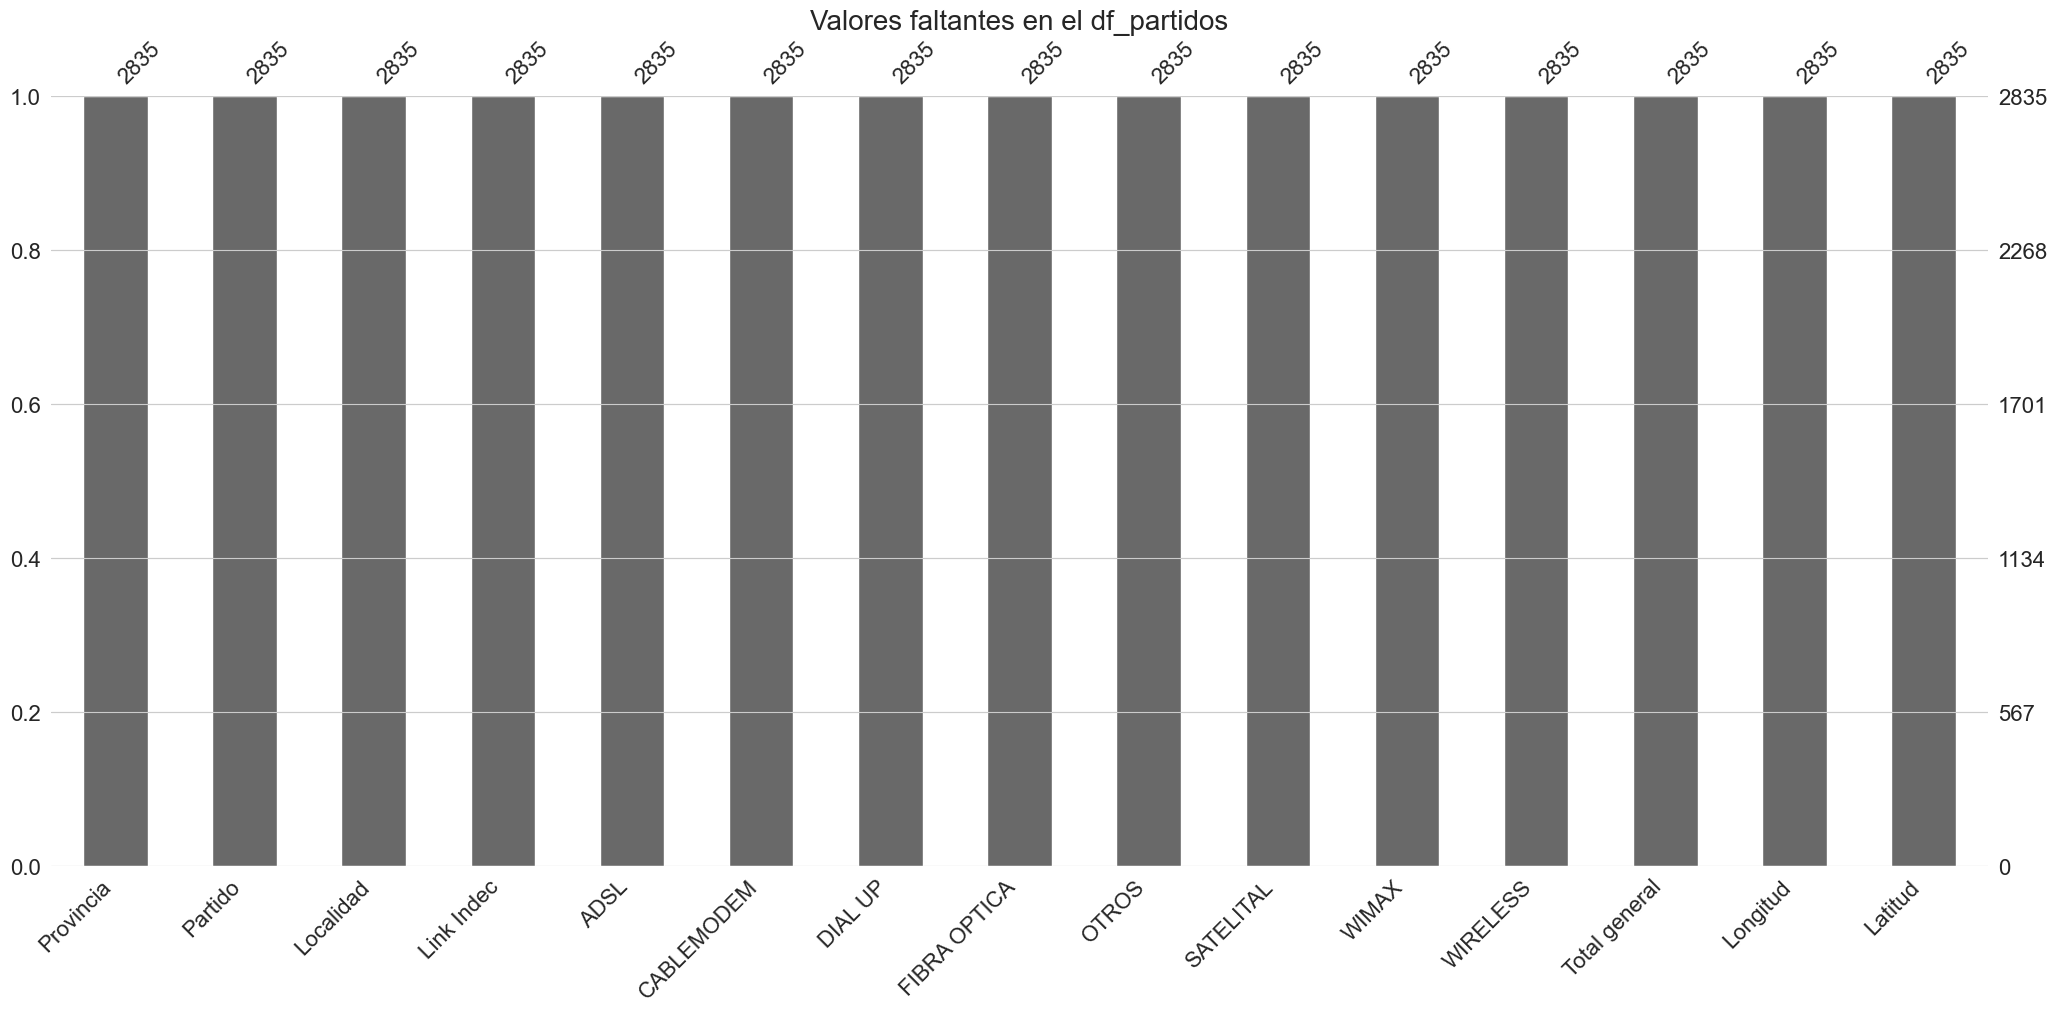

In [36]:
# Revisamos los valores faltantes del df
msno.bar(df_partidos)
plt.title('Valores faltantes en el df_partidos', fontsize=20) 
plt.show()  # no parece tener valores faltantes

#### No hay datos faltantes en este dataframe, pero carece de información de la fecha (año, trimestre) en que fueron generados. Contiene los datos georeferenciados por latitud y longitud.

In [37]:
# Para obtener el resumen estadístico descriptivo de las variables numéricas
df_partidos.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Longitud,Latitud
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,756,4600,0,3,0,742,0,726,6827,-60.173121,-35.433939
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192,-60.731609,-35.897345
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181,-60.081358,-35.164397
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,496,16,0,0,185,1479,-59.771933,-35.272779
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6,-59.988065,-35.483827


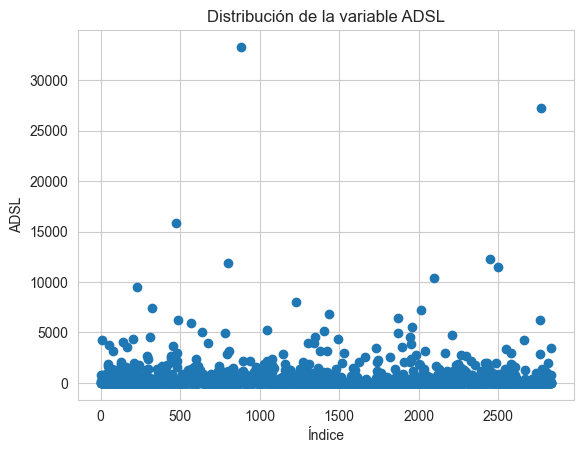

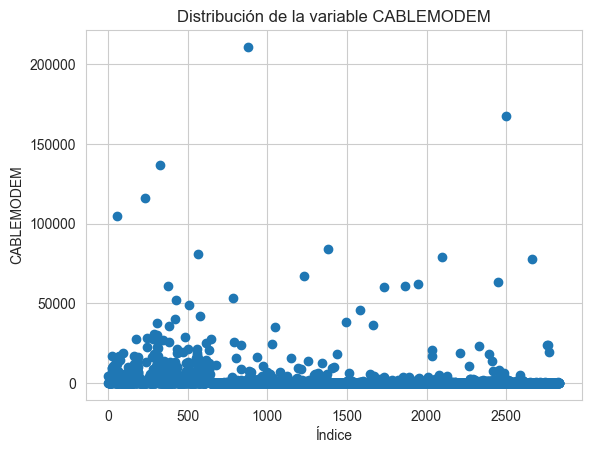

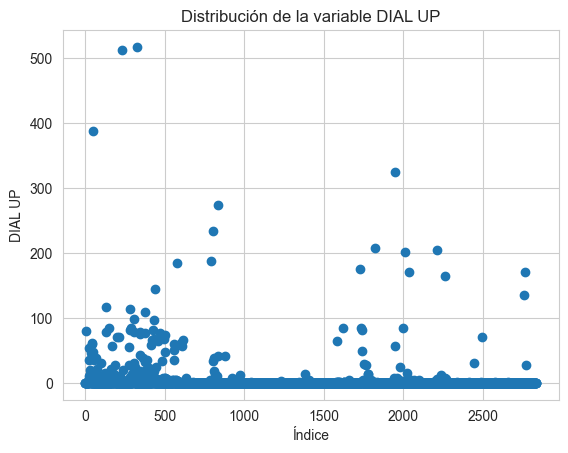

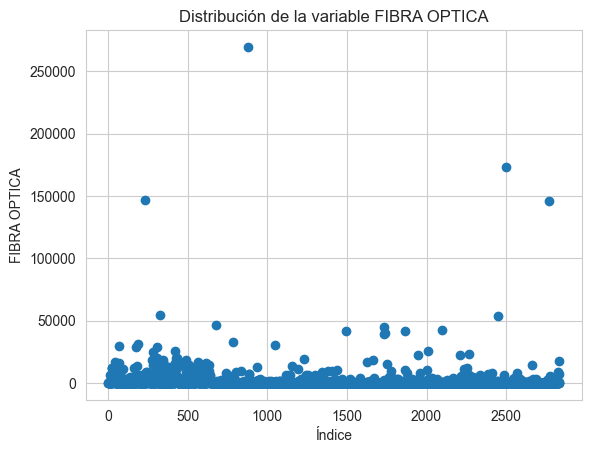

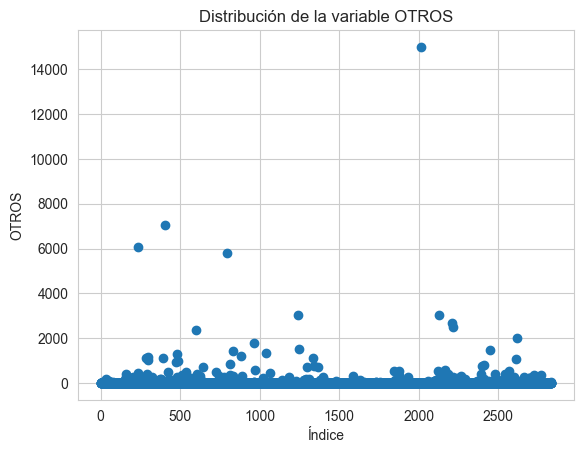

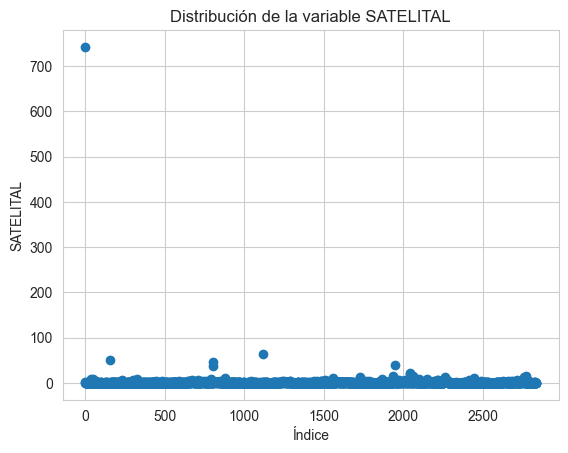

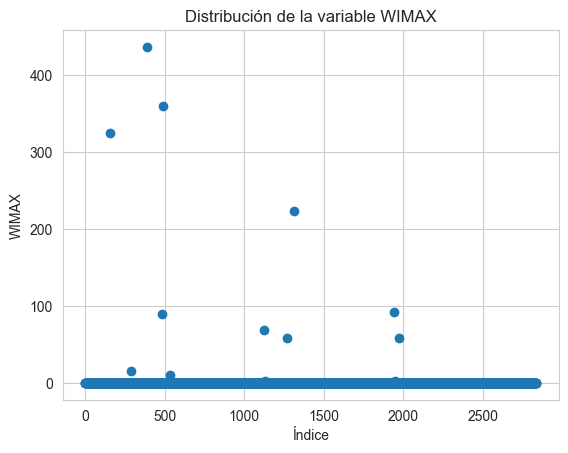

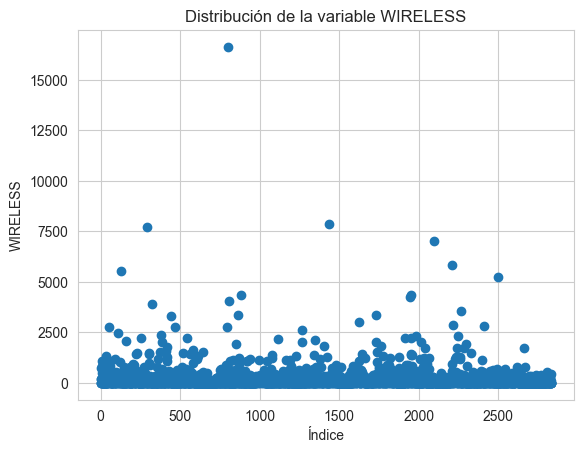

In [38]:
# Lista de columnas para analizar
columnas = ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']

# Iterar sobre las columnas y generar gráficos de dispersión
for columna in columnas:
    plt.scatter(range(len(df_partidos)), df_partidos[columna])
    plt.xlabel('Índice')
    plt.ylabel(columna)
    plt.title(f'Distribución de la variable {columna}')
    plt.show()

#### Observamos que en general los datos se encuentran concentrados dentro del estrato mas bajo de los valores.

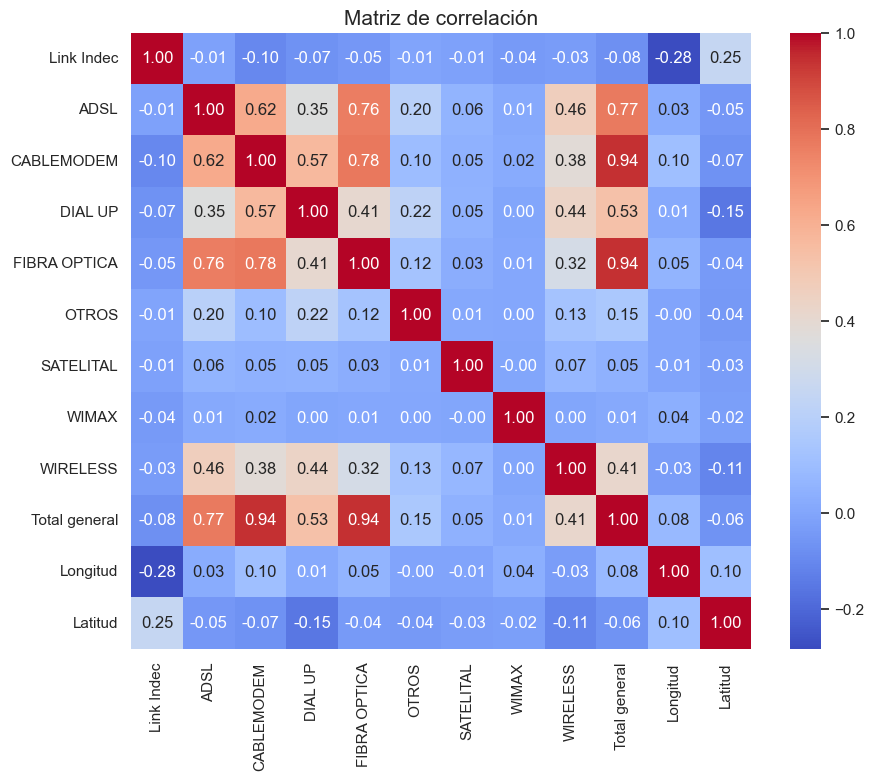

In [39]:
# Calculamos la matriz de correlación
corr_matrix = df_partidos.select_dtypes(include=[np.number]).corr()
sns.set(style="white")

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matriz de correlación', fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

#### En este caso parece haber una clara correlacion negativa de las variables respecto a "Satelital" y "Wimax"

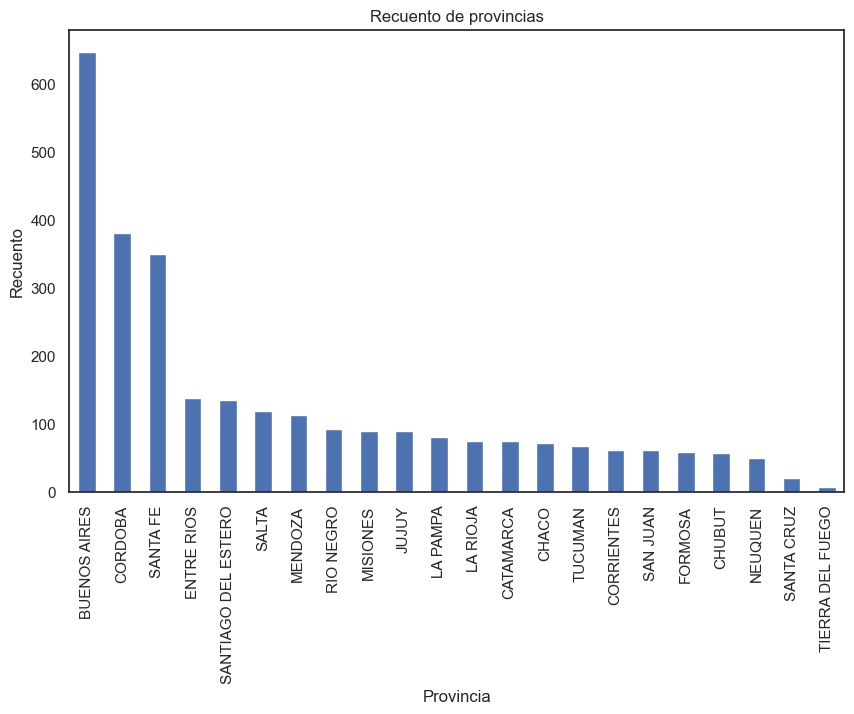

In [40]:
# Recuento de provincias
cuenta_provincia = df_partidos['Provincia'].value_counts()

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
cuenta_provincia.plot(kind='bar')
plt.xlabel('Provincia')
plt.ylabel('Recuento')
plt.title('Recuento de provincias')
plt.show()

#### Podemos notar que hay mayor información procedente de Bs.As., Córdoba y Santa Fe

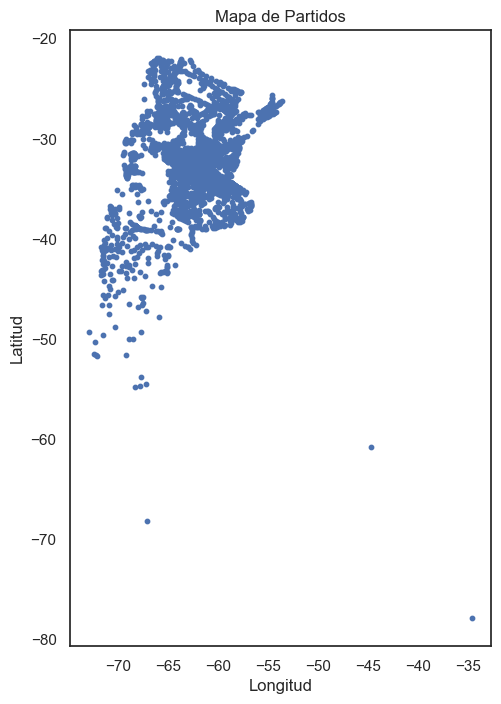

In [41]:

df_partidos['Latitud'] = df_partidos['Latitud'].apply(lambda x: str(x).replace('..', '.')).astype(float)
df_partidos['Longitud'] = df_partidos['Longitud'].apply(lambda x: str(x).replace('..', '.')).astype(float)

#df_partidos['Latitud'] = df_partidos['Latitud'].str.replace('..', '.')
#df_partidos['Longitud'] = df_partidos['Longitud'].str.replace('..', '.')
#df_partidos['Latitud'] = df_partidos['Latitud'].astype(float)
#df_partidos['Longitud'] = df_partidos['Longitud'].astype(float)


# Creamos un objeto GeoDataFrame a partir de las columnas "Latitud" y "Longitud"
geometry = gpd.points_from_xy(df_partidos['Longitud'], df_partidos['Latitud'])
gdf = gpd.GeoDataFrame(df_partidos, geometry=geometry)

fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, markersize=10)

ax.set_title('Mapa de Partidos')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

plt.show()